Project 5

# Gobal Power Plan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

### Accessing the DataSet

In [2]:
gpp= pd.read_csv('database_IND.csv')
gpp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


## Exploratory Data Analysis

In [3]:
gpp.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [4]:
gpp.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [5]:
gpp.shape

(908, 25)

In [6]:
gpp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [7]:
#Dropping columns with 99% null data
gpp=gpp.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1)

In [8]:
# Removing Null Values

In [9]:
fil = ['latitude','longitude','other_fuel1','commissioning_year','owner','geolocation_source','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_data_source']

In [10]:
for i in range(len(fil)):
    gpp[fil[i]] = gpp[fil[i]].fillna(gpp[fil[i]].dropna().mode().values[0] )

In [11]:
gpp.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [12]:
gpp.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

In [13]:
gpp=gpp.drop(['country','country_long','name','gppd_idnr','other_fuel1','year_of_capacity_data','generation_data_source'],axis=1)

## Data Visualization

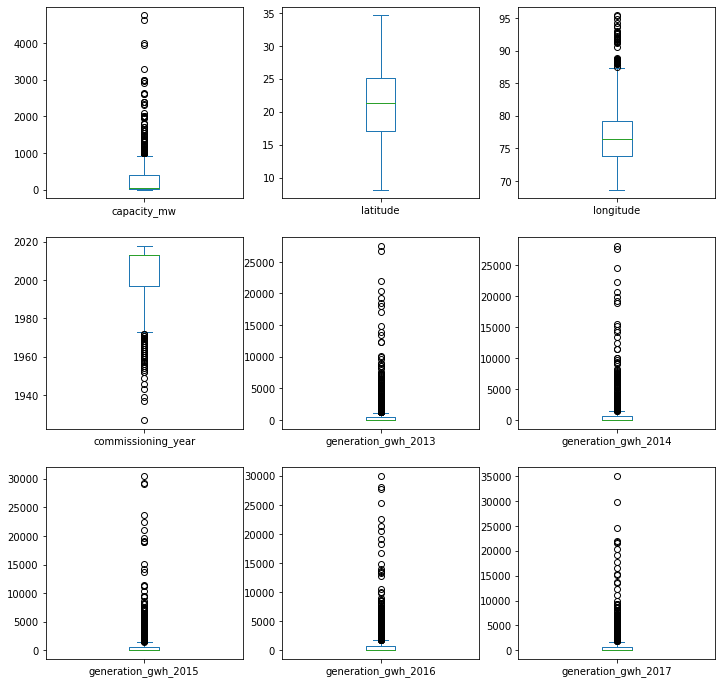

In [14]:
gpp.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

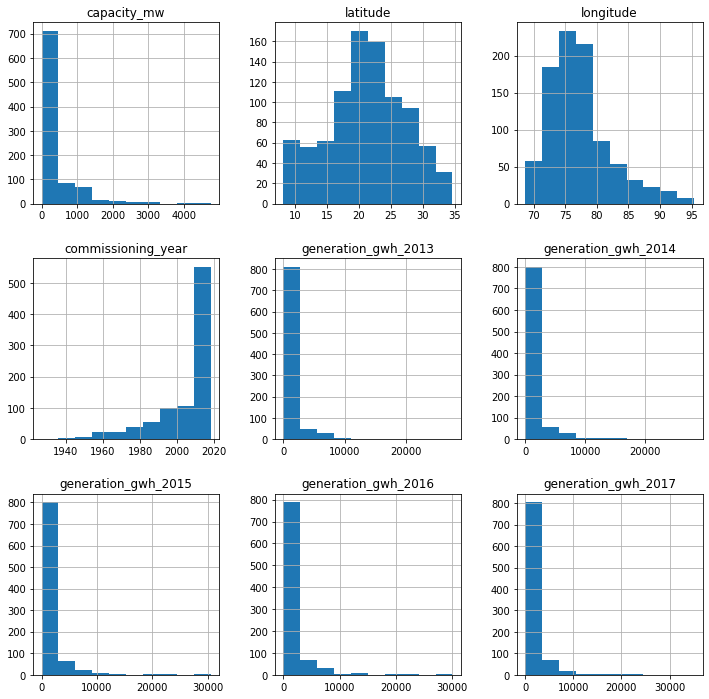

In [15]:
gpp.hist(figsize=(12,12),layout=(3,3),sharex=False);

# For Fuel Type Prediction 

In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler,LabelEncoder

df = gpp.copy()
df = df.apply(LabelEncoder().fit_transform)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,9,730,143,6,65,229,109,128,1,0,0,0,0,0
1,180,593,234,1,67,258,174,173,2,0,0,0,0,0
2,122,420,8,7,67,2,21,205,2,0,0,0,0,0
3,204,546,807,2,58,5,22,58,2,158,157,198,199,178
4,345,423,703,1,69,5,22,58,2,228,274,350,361,340


In [17]:
ss = StandardScaler().fit(df.drop('primary_fuel',axis=1))

In [18]:
X = ss.transform(df.drop('primary_fuel',axis=1))
y = gpp.primary_fuel

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
model=dtc.fit(X_train,y_train)
y_pred = model.predict(X_test)

acc_test = dtc.score(X_test,y_test)
acc_train = dtc.score(X_train,y_train)
print("Accuracy: {:,.2f} ".format(acc_test*100),"%")

Accuracy: 82.78  %


### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model1=lr.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

acc1_test = lr.score(X_test,y_test)
acc1_train = lr.score(X_train,y_train)
print("Accuracy: {:,.2f} ".format(acc1_test*100),"%")

Accuracy: 76.56  %


### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model2 = rfc.fit(X_train,y_train) 
y_pred2 = model2.predict(X_test)

acc2_test = rfc.score(X_test,y_test)
acc2_train = rfc.score(X_train,y_train)
print("Accuracy: {:,.2f} ".format(acc2_test*100),"%")

Accuracy: 86.08  %


##### From above models, we can say that  Random Forest  Classifier is best model for the given problem statement to predict value of capacity_mw  with accuracy of 86.08%

# For capacity_mw Prediction

In [23]:
#Feature Scaling
df = gpp.copy()
df = df.apply(LabelEncoder().fit_transform)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,9,730,143,6,65,229,109,128,1,0,0,0,0,0
1,180,593,234,1,67,258,174,173,2,0,0,0,0,0
2,122,420,8,7,67,2,21,205,2,0,0,0,0,0
3,204,546,807,2,58,5,22,58,2,158,157,198,199,178
4,345,423,703,1,69,5,22,58,2,228,274,350,361,340


In [24]:
X =df.drop('capacity_mw',axis=1)
y = gpp.capacity_mw

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(X_train, y_train)
y_pred= mlr.predict(X_test)

acc = mlr.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc*100),"%")

Accuracy: 62.13  %


### Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()  
rfr.fit(X_train, y_train)
y_pred1= rfr.predict(X_test)

acc1 = rfr.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc1*100),"%")

Accuracy: 90.68  %


### Lasso Regression

In [28]:
from sklearn.linear_model import Lasso

lr = Lasso()  
lr.fit(X_train, y_train)
y_pred2= lr.predict(X_test)

acc2 = lr.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc2*100),"%")

Accuracy: 62.14  %


##### From above models, we can say that  Random Forest Regressor is best model for the given problem statement to predict value of capacity_mw  with accuracy of 90.68%